<a href="https://colab.research.google.com/github/thcesarc/UnivariateSimpleLinearRegression/blob/main/SimpleLinearRegression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.metrics      import r2_score
from   sklearn.linear_model import LinearRegression

###Loading, selecting and splitting dataset

In [3]:
#loading
full_dataset = pd.read_csv('Summary of Weather.csv', low_memory=False)

In [4]:
#selection filter: select all dataframe rows in which the 'STA' (station) feature column is equals to the paris station code (34022)
paris_filter = full_dataset['STA'] == 34022

In [5]:
#split the dataset
minimum_temperatures = full_dataset[paris_filter].loc[:,'MinTemp'].values
maximum_temperatures = full_dataset[paris_filter].loc[:,'MaxTemp'].values

###Are both quantities linearly correlated?
(Pearson's R)

In [6]:
np.corrcoef(minimum_temperatures,maximum_temperatures)

array([[1.        , 0.88071397],
       [0.88071397, 1.        ]])

Any value above 70% indicates a strong positive linear correlation. So yes, we can proceed our analysis by creating a LinearRegression class object and transforming the data into a tensorial format - the only one accepted by scikit learn models. In short terms, this means passing only arrays of arrays to the model;

###Object instantiation and data fitting

In [7]:
estimator = LinearRegression()

In [8]:
#'training' the model: find w0 and w1 from the formula f(x) = w1 * x + w0
estimator.fit(minimum_temperatures.reshape(-1,1) , maximum_temperatures.reshape(-1,1))#reshaped into a tensorial form

LinearRegression()

In [9]:
w1,w0 = estimator.coef_ , estimator.intercept_
print('w1 :', w1)
print('w0 :', w0)

w1 : [[1.23809106]]
w0 : [7.89836196]


###Predict values

In [13]:
predicted = estimator.predict(minimum_temperatures.reshape(-1,1))

###Computing the R² score

In [14]:
score = r2_score(maximum_temperatures, predicted)
print("{0:.2f}% of the data is well explained by the model.".format(score*100))

77.57% of the data is well explained by the model.


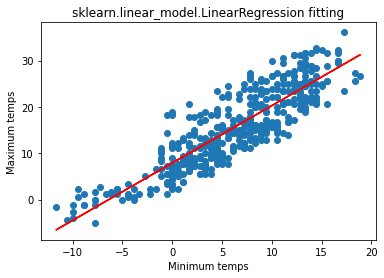

In [11]:
plt.scatter(minimum_temperatures, maximum_temperatures)
plt.title('sklearn.linear_model.LinearRegression fitting')
plt.xlabel('Minimum temps')
plt.ylabel('Maximum temps')
plt.plot(minimum_temperatures,predicted_set,color='red')
plt.show()
